In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load the dataset
url = '/content/bank.csv'
data = pd.read_csv(url, sep=';')

In [ ]:
# Step 3: Preprocessing
# Convert categorical data to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

In [ ]:
# Step 4: Split into features (X) and target (y)
X = data_encoded.drop('y_yes', axis=1)  # 'y_yes' is the target after one-hot encoding
y = data_encoded['y_yes']

In [ ]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Step 6: Build and train the Decision Tree model
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
# Step 7: Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8953574060427414

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.96      0.94      1205
        True       0.55      0.38      0.45       152

    accuracy                           0.90      1357
   macro avg       0.74      0.67      0.70      1357
weighted avg       0.88      0.90      0.89      1357



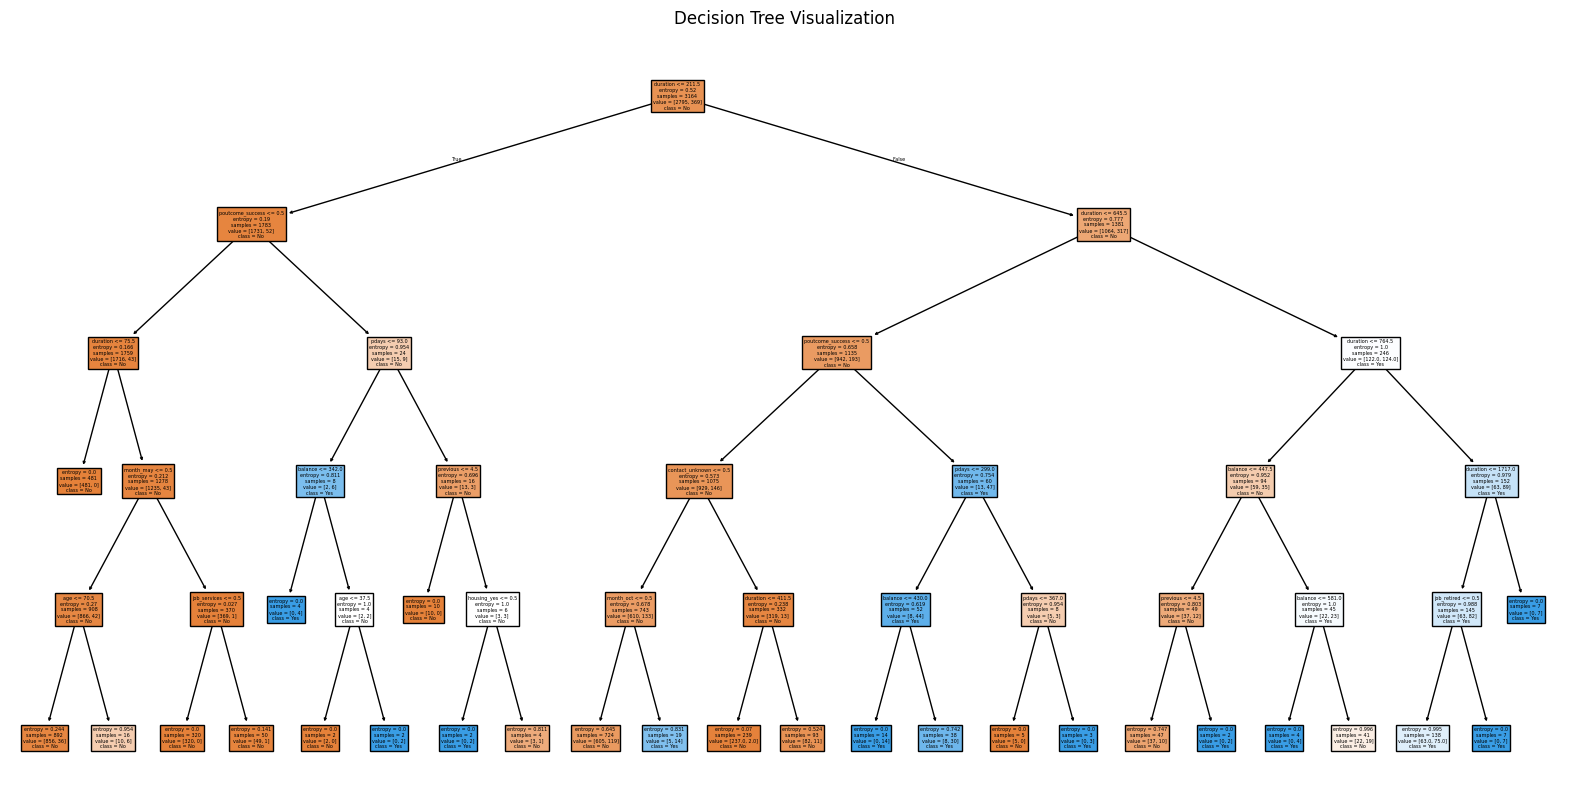

In [ ]:
# Step 8: Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()